In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['figure.figsize'] = (12,5)

# load AQI master file
path = "../processed/aqi_master.csv"

if not os.path.exists(path):
    print("Processed file not found. Falling back to raw historical file.")
    path = "../data/aqi_historical_data.csv"

df = pd.read_csv(path)

df.head()


Processed file not found. Falling back to raw historical file.


,Station,Lat,Lon,Timestamp,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI,Type
0,Indore - MG Road,22.718,75.847,2025-11-22 05:00:00,420.24,0.64,3.89,85.23,8.53,122.98,133.69,5.20,5,Historical
1,Indore - MG Road,22.718,75.847,2025-11-22 06:00:00,413.21,0.46,2.92,99.65,8.67,127.34,137.79,4.77,5,Historical
2,Indore - MG Road,22.718,75.847,2025-11-22 07:00:00,285.38,0.22,1.99,156.38,24.74,119.41,128.10,0.00,5,Historical
3,Indore - MG Road,22.718,75.847,2025-11-22 08:00:00,252.19,0.16,1.59,165.93,23.67,114.00,121.68,0.00,5,Historical
4,Indore - MG Road,22.718,75.847,2025-11-22 09:00:00,239.96,0.12,1.47,166.38,20.99,110.00,117.00,0.00,5,Historical


In [3]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

# Ensure timestamp is datetime
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
elif 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

print("\nMissing values:\n")
print(df.isnull().sum().sort_values(ascending=False))

# Remove duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicates removed: {duplicates}")
df = df.drop_duplicates().reset_index(drop=True)


Shape: (12550, 14)

Columns: ['station', 'lat', 'lon', 'timestamp', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'aqi', 'type']

Data Types:
station       object
lat          float64
lon          float64
timestamp     object
co           float64
no           float64
no2          float64
o3           float64
so2          float64
pm2_5        float64
pm10         float64
nh3          float64
aqi            int64
type          object
dtype: object

Missing values:

station      0
lat          0
lon          0
timestamp    0
co           0
no           0
no2          0
o3           0
so2          0
pm2_5        0
pm10         0
nh3          0
aqi          0
type         0
dtype: int64

Duplicates removed: 0


In [5]:
# pollutant columns (lowercase after preprocessing)
pollutants = ['co','no','no2','o3','so2','pm2_5','pm10','nh3','aqi']

available = [p for p in pollutants if p in df.columns]
print("Available pollutant columns:", available)

if len(available) > 0:
    df[available].describe()
else:
    print("No pollutant columns found. Check df.columns below:")
    print(df.columns.tolist())


Available pollutant columns: ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'aqi']


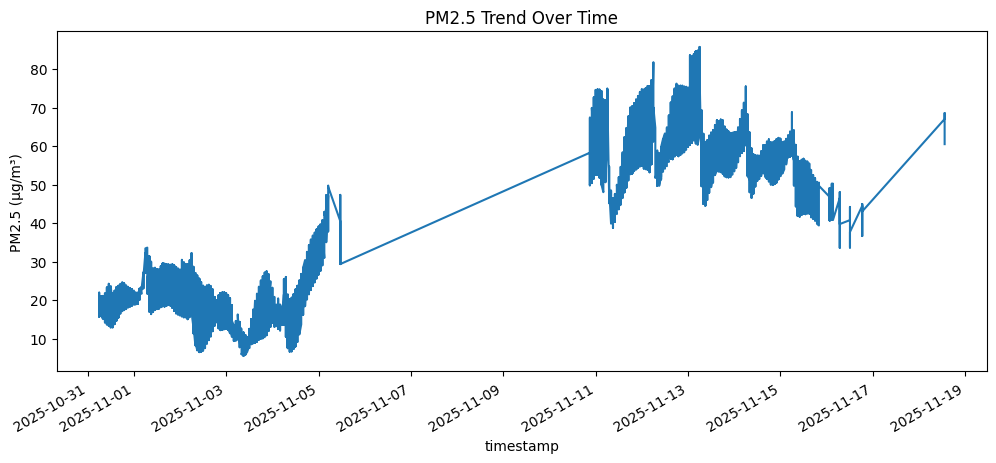

In [6]:
if 'Timestamp' in df.columns:
    df = df.sort_values('Timestamp')
    df.set_index('Timestamp')['PM2_5'].plot(title="PM2.5 Trend Over Time")
    plt.ylabel("PM2.5 (µg/m³)")
    plt.show()
elif 'timestamp' in df.columns:
    df = df.sort_values('timestamp')
    df.set_index('timestamp')['pm2_5'].plot(title="PM2.5 Trend Over Time")
    plt.ylabel("PM2.5 (µg/m³)")
    plt.show()
else:
    print("Timestamp column not found! Skipping time-series plot.")


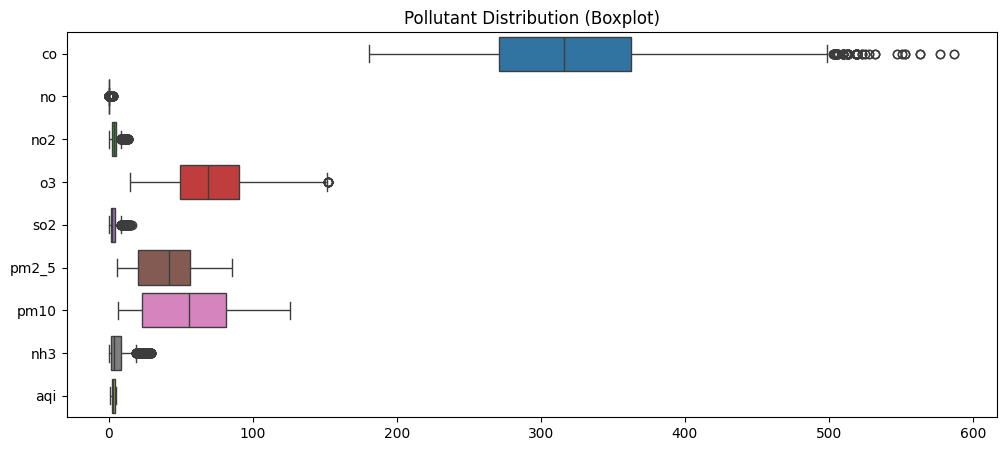

In [7]:
sns.boxplot(data=df[available], orient='h')
plt.title("Pollutant Distribution (Boxplot)")
plt.show()


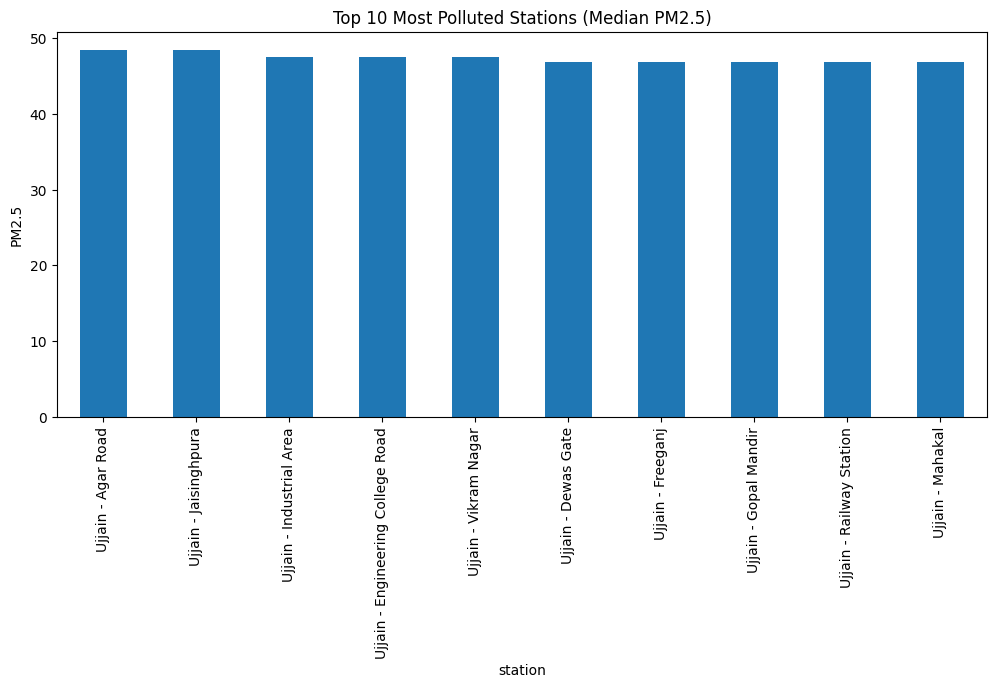

In [8]:
if 'Station' in df.columns and 'PM2_5' in df.columns:
    station_pm = df.groupby('Station')['PM2_5'].median().sort_values(ascending=False)
    station_pm.head(10).plot(kind='bar')
    plt.title("Top 10 Most Polluted Stations (Median PM2.5)")
    plt.ylabel("PM2.5")
    plt.show()
elif 'station' in df.columns:
    station_pm = df.groupby('station')['pm2_5'].median().sort_values(ascending=False)
    station_pm.head(10).plot(kind='bar')
    plt.title("Top 10 Most Polluted Stations (Median PM2.5)")
    plt.ylabel("PM2.5")
    plt.show()
else:
    print("Station column not found.")


In [9]:
if 'Timestamp' in df.columns:
    df['date'] = df['Timestamp'].dt.date
elif 'timestamp' in df.columns:
    df['date'] = df['timestamp'].dt.date

poll_cols = [c for c in ['pm2_5','PM2_5','AQI','aqi'] if c in df.columns]
daily = df.groupby('date')[poll_cols].median().reset_index()

os.makedirs("../results", exist_ok=True)
daily.to_csv("../results/aqi_daily_median.csv", index=False)

print("Daily median AQI saved to ../results/aqi_daily_median.csv")


Daily median AQI saved to ../results/aqi_daily_median.csv
